In [1]:
pip install yfinance pandas numpy matplotlib seaborn scikit-learn


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score



In [3]:
# Download stock data (example: TCS)
stock = yf.download("TCS.NS", start="2019-01-01", end="2024-01-01")

# Display first 5 rows
stock.head()


/tmp/ipython-input-3059028898.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("TCS.NS", start="2019-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2019-01-03,1608.515137,1646.612551,1602.715884,1624.643084,2611668
2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423


In [4]:
# Create Moving Averages
stock['MA_10'] = stock['Close'].rolling(window=10).mean()
stock['MA_50'] = stock['Close'].rolling(window=50).mean()

# Drop missing values
stock.dropna(inplace=True)

stock.head()


Price,Close,High,Low,Open,Volume,MA_10,MA_50
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,,
Date,,,,,,,
2019-03-13,1697.271973,1710.337721,1678.691469,1707.877271,1833163,1704.347852,1663.414653
2019-03-14,1686.157959,1703.465830,1680.728024,1701.047739,1905495,1698.349512,1664.919250
2019-03-15,1730.742188,1755.346479,1689.211882,1695.914451,5184318,1703.143152,1666.968423
2019-03-18,1716.192017,1751.656179,1706.180573,1733.330139,2349915,1705.467847,1669.121960
2019-03-19,1716.192017,1722.300628,1692.690611,1722.300628,2373993,1708.411877,1671.666628


In [5]:
# Features and target
X = stock[['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50']]
y = stock['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)


In [8]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 11.37409408624133
R2 Score: 0.9992408879673121


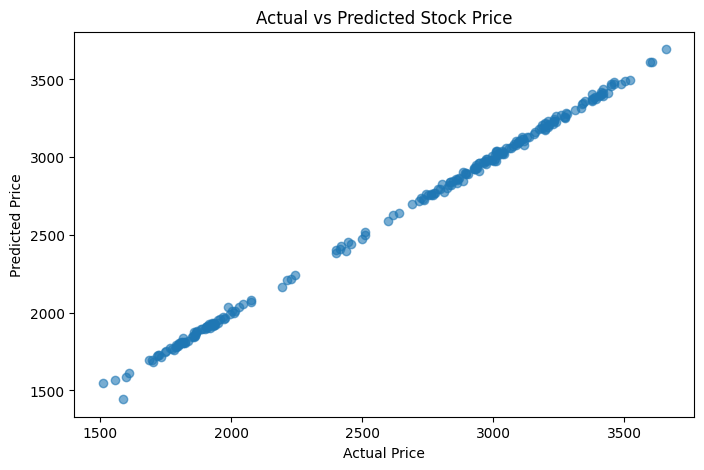

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Stock Price")
plt.show()


In [12]:
# Get latest data
latest_data = X.iloc[-1].values.reshape(1, -1)
predicted_price = model.predict(latest_data)[0]
current_price = stock['Close'].iloc[-1].item()

print("Current Price:", current_price)
print("Predicted Price:", predicted_price)

if predicted_price > current_price:
    print("Recommendation: BUY")
elif predicted_price < current_price:
    print("Recommendation: SELL")
else:
    print("Recommendation: HOLD")

Current Price: 3597.1025390625
Predicted Price: [3600.23850773]
Recommendation: BUY


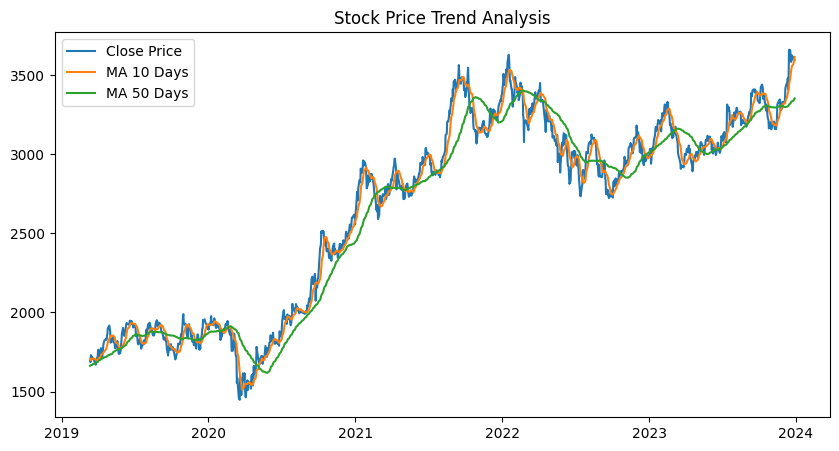

In [13]:
plt.figure(figsize=(10,5))
plt.plot(stock['Close'], label="Close Price")
plt.plot(stock['MA_10'], label="MA 10 Days")
plt.plot(stock['MA_50'], label="MA 50 Days")
plt.title("Stock Price Trend Analysis")
plt.legend()
plt.show()
